In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message=".*datetime.datetime.utcnow.*")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [28]:
# Loading CSV
df = pd.read_csv('/content/ Social Media.csv')
df.head(10)


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
5,6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
6,7,56,Male,India,46201,False,False,Students,Rural,TikTok,...,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
7,8,36,Male,Barzil,39715,False,False,Engineer,Rural,Instagram,...,3,7,Entertainment,Tablet,Android,9:00 PM,5,5,At home,Mobile Data
8,9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Mobile Data
9,10,28,Other,United States,35078,False,False,Students,Rural,YouTube,...,6,4,Boredom,Smartphone,iOS,2:00 PM,8,2,At home,Mobile Data


# Preprocessing : Data Type conversion and Time standardisation

In [29]:
# Striping of  whitespace
df.columns = df.columns.str.strip()
df.drop(['UserID', 'Debt', 'Owns Property', 'Number of Sessions', 'Video ID', 'Engagement', 'Importance Score', 'Scroll Rate', 'OS', 'CurrentActivity' ], axis=1, inplace=True)


# Converting Watch Time into datetime
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p', errors='coerce')

# Checking conversion
print("Non-convertible 'Watch Time' entries:")
print(df[df['Watch Time'].isnull()])

df.head(10)

Non-convertible 'Watch Time' entries:
Empty DataFrame
Columns: [Age, Gender, Location, Income, Profession, Demographics, Platform, Total Time Spent, Video Category, Video Length, Time Spent On Video, Number of Videos Watched, Frequency, ProductivityLoss, Satisfaction, Watch Reason, DeviceType, Watch Time, Self Control, Addiction Level, ConnectionType]
Index: []

[0 rows x 21 columns]


,Age,Gender,Location,Income,Profession,Demographics,Platform,Total Time Spent,Video Category,Video Length,...,Number of Videos Watched,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,Watch Time,Self Control,Addiction Level,ConnectionType
0,56,Male,Pakistan,82812,Engineer,Rural,Instagram,80,Pranks,24,...,22,Night,3,7,Procrastination,Smartphone,1900-01-01 21:00:00,5,5,Mobile Data
1,46,Female,Mexico,27999,Artist,Urban,Instagram,228,Pranks,19,...,31,Afternoon,5,5,Habit,Computer,1900-01-01 17:00:00,7,3,Wi-Fi
2,32,Female,United States,42436,Engineer,Rural,Facebook,30,Vlogs,19,...,7,Evening,6,4,Entertainment,Tablet,1900-01-01 14:00:00,8,2,Mobile Data
3,60,Male,Barzil,62963,Waiting staff,Rural,YouTube,101,Vlogs,4,...,41,Night,3,7,Habit,Smartphone,1900-01-01 21:00:00,5,5,Mobile Data
4,25,Male,Pakistan,22096,Manager,Urban,TikTok,136,Gaming,19,...,21,Morning,8,2,Boredom,Smartphone,1900-01-01 08:00:00,10,0,Mobile Data
5,38,Male,Vietnam,45279,driver,Urban,Instagram,89,Jokes/Memes,9,...,16,Night,3,7,Entertainment,Computer,1900-01-01 21:00:00,5,5,Wi-Fi
6,56,Male,India,46201,Students,Rural,TikTok,247,Vlogs,16,...,20,Morning,8,2,Habit,Smartphone,1900-01-01 08:00:00,10,0,Wi-Fi
7,36,Male,Barzil,39715,Engineer,Rural,Instagram,191,Entertainment,27,...,43,Night,3,7,Entertainment,Tablet,1900-01-01 21:00:00,5,5,Mobile Data
8,40,Male,United States,49309,Waiting staff,Rural,Instagram,34,Vlogs,4,...,44,Night,3,7,Entertainment,Computer,1900-01-01 21:00:00,5,5,Mobile Data
9,28,Other,United States,35078,Students,Rural,YouTube,165,ASMR,6,...,47,Evening,6,4,Boredom,Smartphone,1900-01-01 14:00:00,8,2,Mobile Data


In [30]:
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Gender                      0
Location                    0
Income                      0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Video Category              0
Video Length                0
Time Spent On Video         0
Number of Videos Watched    0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
Watch Time                  0
Self Control                0
Addiction Level             0
ConnectionType              0
dtype: int64


# Exploratory Data Analysis (EDA)

    

# 1.  Histogram for numerical values







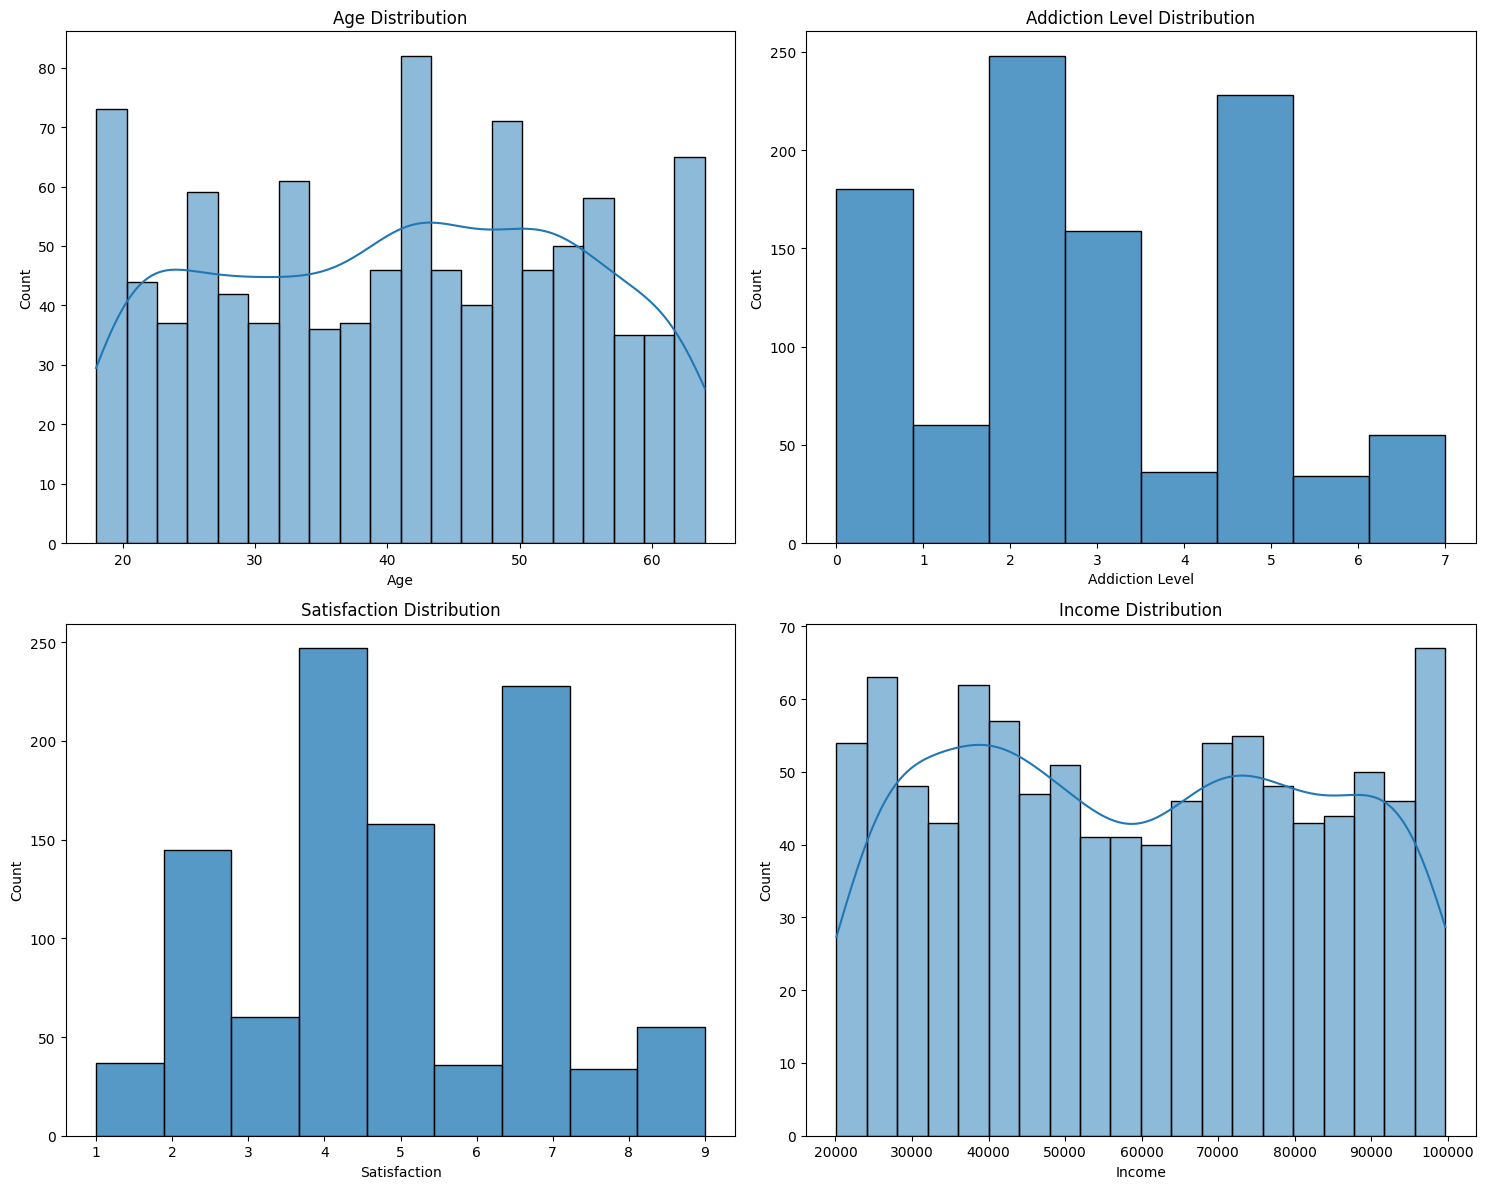

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))


sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0]).set_title("Age Distribution")
sns.histplot(df['Addiction Level'], bins=8, kde=False, ax=axes[0, 1]).set_title("Addiction Level Distribution")
sns.histplot(df['Satisfaction'], bins=9, kde=False, ax=axes[1, 0]).set_title("Satisfaction Distribution")
sns.histplot(df['Income'], bins=20, kde=True, ax=axes[1, 1]).set_title("Income Distribution")


plt.tight_layout()
plt.show()


# 2.  Countplot for all the key  categorical values






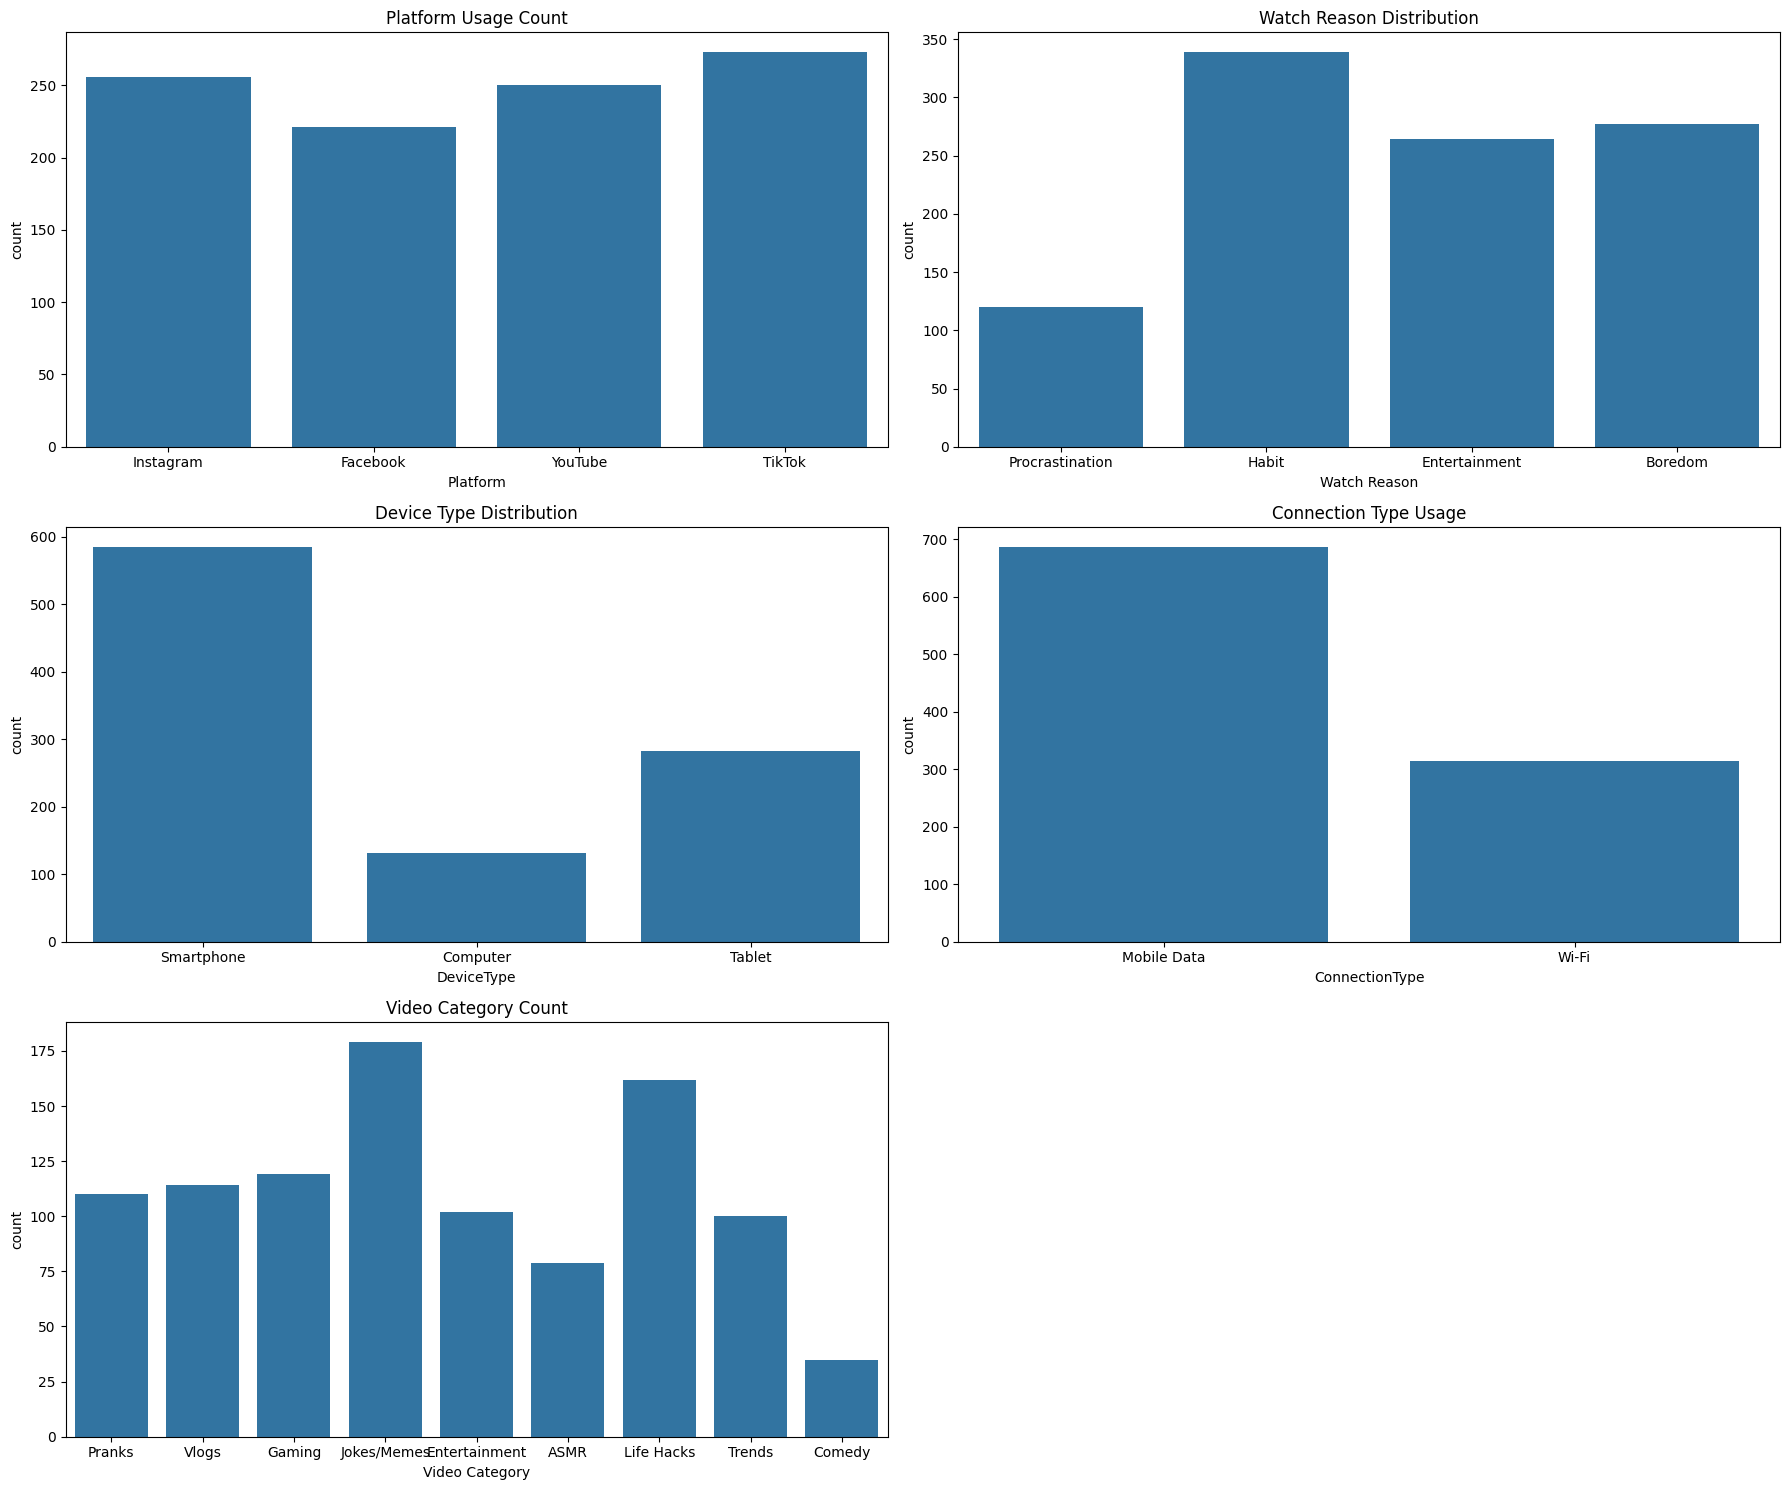

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))


sns.countplot(data=df, x='Platform', ax=axes[0, 0]).set_title("Platform Usage Count")
sns.countplot(data=df, x='Watch Reason', ax=axes[0, 1]).set_title("Watch Reason Distribution")
sns.countplot(data=df, x='DeviceType', ax=axes[1, 0]).set_title("Device Type Distribution")
sns.countplot(data=df, x='ConnectionType', ax=axes[1, 1]).set_title("Connection Type Usage")
sns.countplot(data=df, x='Video Category', ax=axes[2, 0]).set_title("Video Category Count")


fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

# Correlation matrix: Measures Linear Relationship between variables

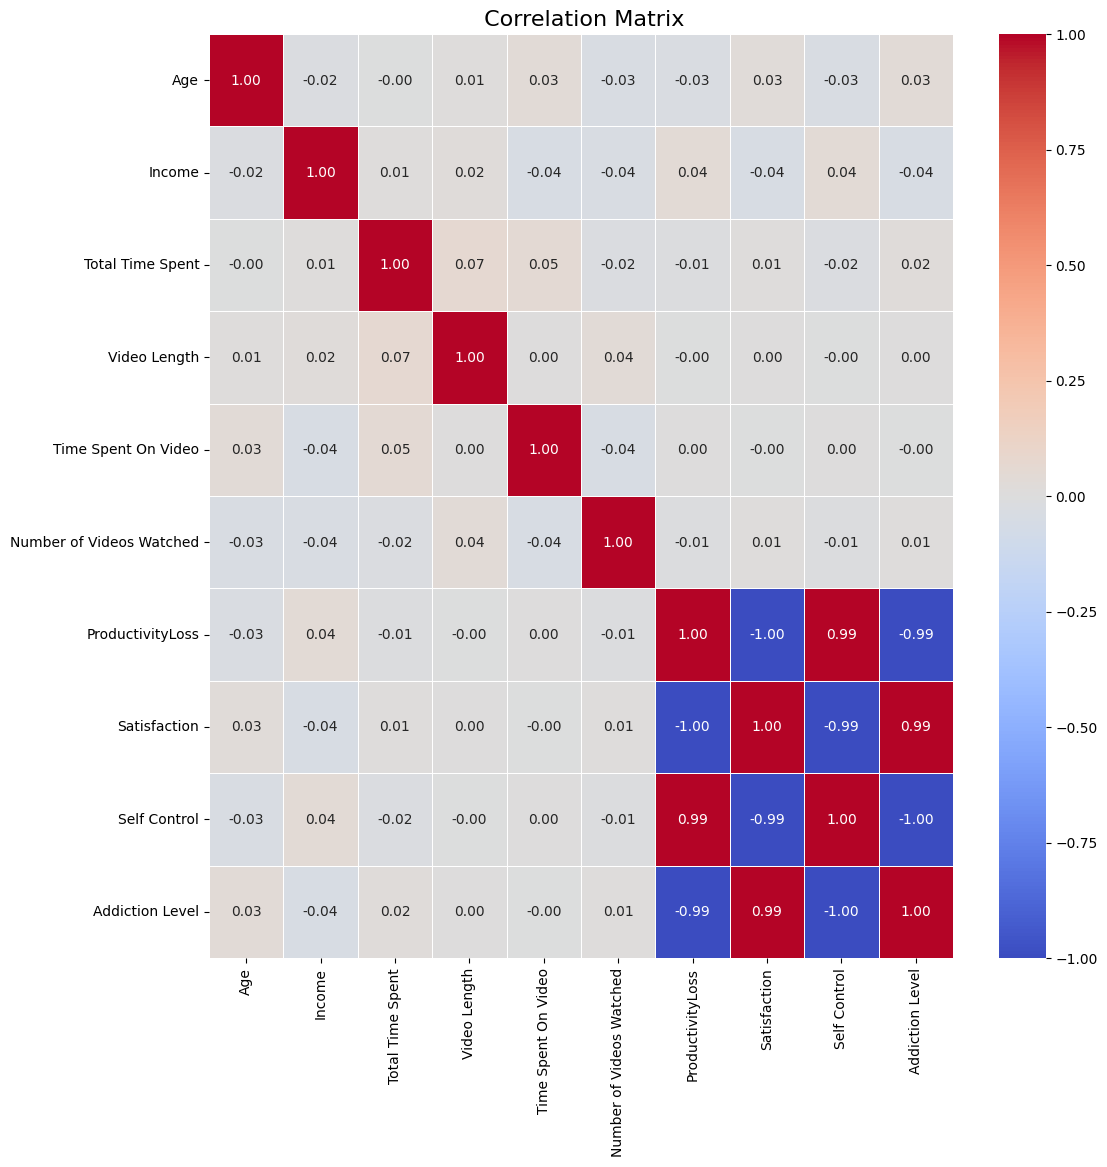

In [33]:
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Computing correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=False, linewidths=0.5)
plt.title(" Correlation Matrix", fontsize=16)
plt.show()


# **Machine Learning Model :**


# 1.Predicting addiction level(0-7) using Random Forest Regressor

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features
features = ['Self Control', 'Satisfaction', 'ProductivityLoss']
X = df[features].copy()
y = df['Addiction Level']

# Added Gaussian noise
np.random.seed(42)
for feature in features:
    noise = np.random.normal(loc=0, scale=1, size=len(X))
    X[feature] += noise

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42)
rf_model.fit(X_train, y_train)

# Accuracy of Prediction
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor → RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")



Random Forest Regressor → RMSE: 0.845, R²: 0.853


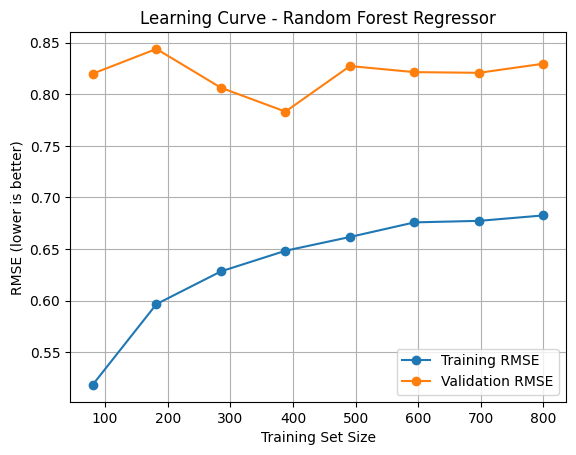

In [35]:
from sklearn.model_selection import learning_curve

# Learning curve of Random forest regressor
def plot_learning_curve_rmse(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_root_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 8), n_jobs=-1, shuffle=True, random_state=4
    )
    plt.plot(train_sizes, -train_scores.mean(axis=1), 'o-', label="Training RMSE")
    plt.plot(train_sizes, -val_scores.mean(axis=1), 'o-', label="Validation RMSE")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE (lower is better)")
    plt.title("Learning Curve - Random Forest Regressor")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot
plot_learning_curve_rmse(rf_model, X, y)


In [36]:
from xgboost import XGBRegressor

# Added Gaussian noise
X = df[features].copy()
np.random.seed(42)
for feature in features:
    noise = np.random.normal(loc=0, scale=1, size=len(X))
    X[feature] += noise

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=150, learning_rate=0.4, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Accuracy of prediction
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor → RMSE: {rmse_xgb:.3f}, R²: {r2_xgb:.3f}")


XGBoost Regressor → RMSE: 0.695, R²: 0.901


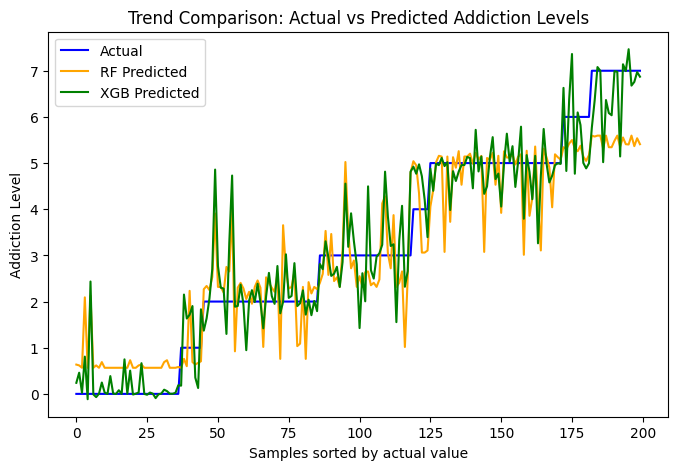

In [37]:
import matplotlib.pyplot as plt
import numpy as np


sorted_idx = np.argsort(y_test)
plt.figure(figsize=(8,5))
plt.plot(y_test.values[sorted_idx], label='Actual', color='blue')
plt.plot(y_pred_rf[sorted_idx], label='RF Predicted', color='orange')
plt.plot(y_pred_xgb[sorted_idx], label='XGB Predicted', color='green')
plt.title("Trend Comparison: Actual vs Predicted Addiction Levels")
plt.xlabel("Samples sorted by actual value")
plt.ylabel("Addiction Level")
plt.legend()
plt.show()

# Hyperparameter tuning using Grid SearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
print("Random Forest Best Params:", grid_rf.best_params_)


Random Forest Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 150}


In [39]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)
print("XGBoost Best Params:", grid_xgb.best_params_)


XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# Model Performance After Hyperparameter Optimization

In [40]:
# Select features
features = ['Self Control', 'Satisfaction', 'ProductivityLoss']
X = df[features].copy()
y = df['Addiction Level']

# Add Gaussian noise
np.random.seed(42)
for feature in features:
    noise = np.random.normal(loc=0, scale=1, size=len(X))
    X[feature] += noise

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# With new parameter (After hyperparameter tuning)
rf_model_nw= RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
rf_model_nw.fit(X_train, y_train)

#Accuracy of prediction
y_pred_rf_nw = rf_model_nw.predict(X_test)
rmse_rf_nw = np.sqrt(mean_squared_error(y_test, y_pred_rf_nw))
r2_rf_nw = r2_score(y_test, y_pred_rf_nw)

print(f"Random Forest Regressor → RMSE: {rmse_rf_nw:.3f}, R²: {r2_rf_nw:.3f}")

Random Forest Regressor → RMSE: 0.566, R²: 0.934


In [41]:
from xgboost import XGBRegressor


X = df[features].copy()
np.random.seed(42)
for feature in features:
    noise = np.random.normal(loc=0, scale=1, size=len(X))
    X[feature] += noise

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# With new parameter (After hyperparameter tuning)
xgbb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgbb_model.fit(X_train, y_train)

# Predictions
y_pred_xgbb = xgbb_model.predict(X_test)
rmse_xgbb = np.sqrt(mean_squared_error(y_test, y_pred_xgbb))
r2_xgbb = r2_score(y_test, y_pred_xgbb)

print(f"XGBoost Regressor → RMSE: {rmse_xgbb:.3f}, R²: {r2_xgbb:.3f}")

XGBoost Regressor → RMSE: 0.573, R²: 0.933


           Model  RMSE (Before)  RMSE (After)  R² (Before)  R² (After)
0  Random Forest          0.845         0.566        0.853       0.934
1        XGBoost          0.695         0.573        0.901       0.933


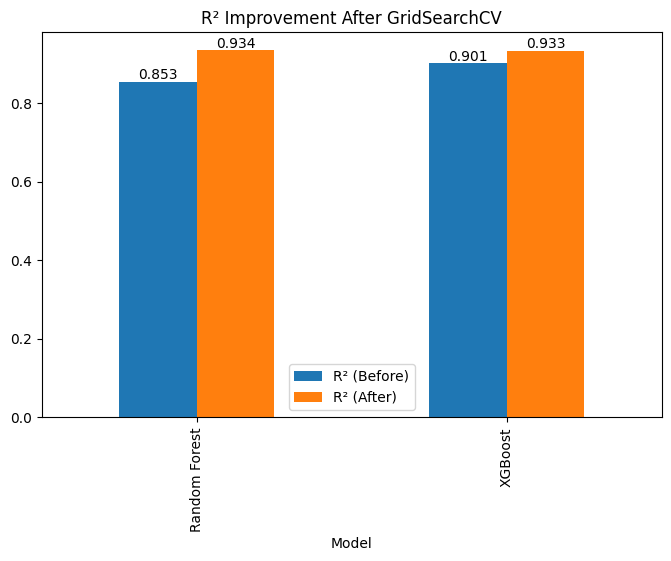

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Model": ["Random Forest", "XGBoost"],
    "RMSE (Before)": [0.845, 0.695],
    "RMSE (After)": [0.566, 0.573],
    "R² (Before)": [0.853, 0.901],
    "R² (After)": [0.934, 0.933]
}

# Creating DataFrame
results_df = pd.DataFrame(data)

# Displaying table
print(results_df)

ax = results_df.set_index("Model")[["R² (Before)", "R² (After)"]].plot(kind='bar', figsize=(8,5), title="R² Improvement After GridSearchCV"); [ax.bar_label(c, fmt='%.3f', label_type='edge') for c in ax.containers]
plt.show()


# Checking which Attribute contributed the most in predicting addiction levels

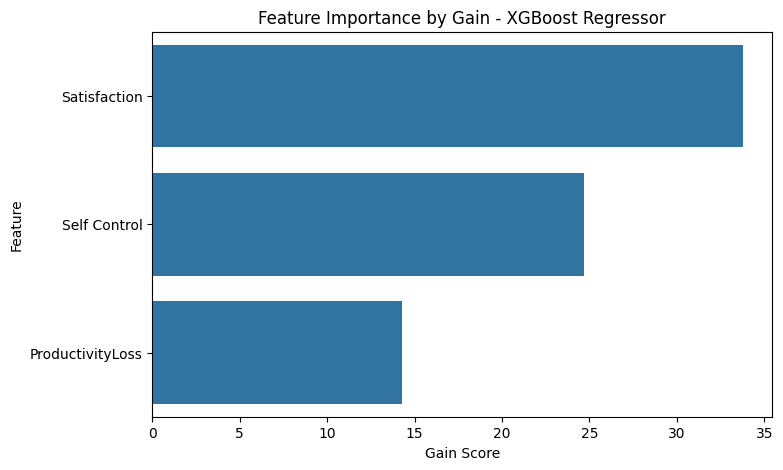

In [43]:
# Feature importance by Gain for XGBoost
gain_importances = xgbb_model.get_booster().get_score(importance_type='gain')
gain_importances = pd.Series(gain_importances).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=gain_importances.values, y=gain_importances.index)
plt.title("Feature Importance by Gain - XGBoost Regressor")
plt.xlabel("Gain Score")
plt.ylabel("Feature")
plt.show()


# Behavioral Pattern Discovery Via Association Rule Mining

In [44]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Creating categories
def addiction_category(level):
    if level <= 2: return 'Low'
    elif level <= 5: return 'Medium'
    else: return 'High'
df['addiction_cat'] = df['addiction_level'].apply(addiction_category)


# columns for mining
rules_df = df[['frequency', 'watch_reason', 'addiction_cat']]

# One-hot encoding
rules_encoded = pd.get_dummies(rules_df)

# Run Apriori
frequent = apriori(rules_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent, metric="lift", min_threshold=1.1)

# Filtering for rules where addiction is the consequence
addiction_rules = rules[rules['consequents'].astype(str).str.contains('addiction_cat')]
print(addiction_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False))

                                        antecedents  \
7                                 (frequency_Night)   
5                               (frequency_Morning)   
25  (frequency_Evening, watch_reason_Entertainment)   
1                             (frequency_Afternoon)   
15        (frequency_Afternoon, watch_reason_Habit)   
20        (frequency_Evening, watch_reason_Boredom)   
31                              (frequency_Evening)   
27                              (frequency_Evening)   
3                               (frequency_Evening)   
22                              (frequency_Evening)   
17                            (frequency_Afternoon)   
29          (frequency_Evening, watch_reason_Habit)   
34            (frequency_Night, watch_reason_Habit)   
37                                (frequency_Night)   
9                                 (frequency_Night)   
13                   (watch_reason_Procrastination)   
11                           (watch_reason_Boredom)   
36        

In [47]:
# Invert self-control & normalize
df['inv_self_control'] = 10 - df['self_control']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['inv_self_control', 'total_time_spent']])
df[['norm_self_control', 'norm_total_time']] = pd.DataFrame(
    scaled, columns=['norm_self_control', 'norm_total_time']
)

# Behavioural addiction calculation
df['behaviour_addiction_score'] = (df['norm_self_control'] + df['norm_total_time']) / 2

#  Creating categories
quantiles = df['behaviour_addiction_score'].quantile([0.33, 0.66]).values

def categorise_behavioural(score):
    if score <= quantiles[0]:
        return 'Low'
    elif score <= quantiles[1]:
        return 'Medium'
    else:
        return 'High'

df['behavioural_addiction_cat'] = df['behaviour_addiction_score'].apply(categorise_behavioural)


rules_df = df[['frequency', 'watch_reason', 'behavioural_addiction_cat']]

# One-hot encoding
rules_encoded = pd.get_dummies(rules_df, prefix_sep='_')

#  Run Apriori
frequent = apriori(rules_encoded, min_support=0.05, use_colnames=True)


# Generating association rules
rules = association_rules(frequent, metric="lift", min_threshold=1.1)
addiction_rules = rules[
    rules['consequents'].apply(lambda x: any('behavioural_addiction_cat_' in i for i in x))
]

# Display top rules
top_rules = addiction_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']] \
    .sort_values(by='lift', ascending=False)
print(top_rules)


                                      antecedents  \
7                             (frequency_Morning)   
15                              (frequency_Night)   
13  (watch_reason_Entertainment, frequency_Night)   
9                               (frequency_Night)   
17          (frequency_Night, watch_reason_Habit)   
19                              (frequency_Night)   
2                             (frequency_Evening)   
4                             (frequency_Evening)   
1                           (frequency_Afternoon)   
11                           (watch_reason_Habit)   

                                          consequents  support  confidence  \
7                     (behavioural_addiction_cat_Low)    0.073    0.688679   
15  (behavioural_addiction_cat_High, watch_reason_...    0.051    0.166667   
13                   (behavioural_addiction_cat_High)    0.051    0.637500   
9                    (behavioural_addiction_cat_High)    0.183    0.598039   
17                   (beha

In [48]:
# Convert frozensets to readable strings
rules['Antecedent'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['Consequent'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Select columns, round numbers, and sort by Lift
top3_rules = (
    rules[['Antecedent', 'Consequent', 'support', 'confidence', 'lift']]
    .round({'support': 2, 'confidence': 2, 'lift': 2})
    .sort_values(by='lift', ascending=False)
    .head(3)
)

# Displaying in notebook
display(top3_rules)

,Antecedent,Consequent,support,confidence,lift
6,behavioural_addiction_cat_Low,frequency_Morning,0.07,0.22,2.08
7,frequency_Morning,behavioural_addiction_cat_Low,0.07,0.69,2.08
12,"behavioural_addiction_cat_High, watch_reason_E...",frequency_Night,0.05,0.59,1.92


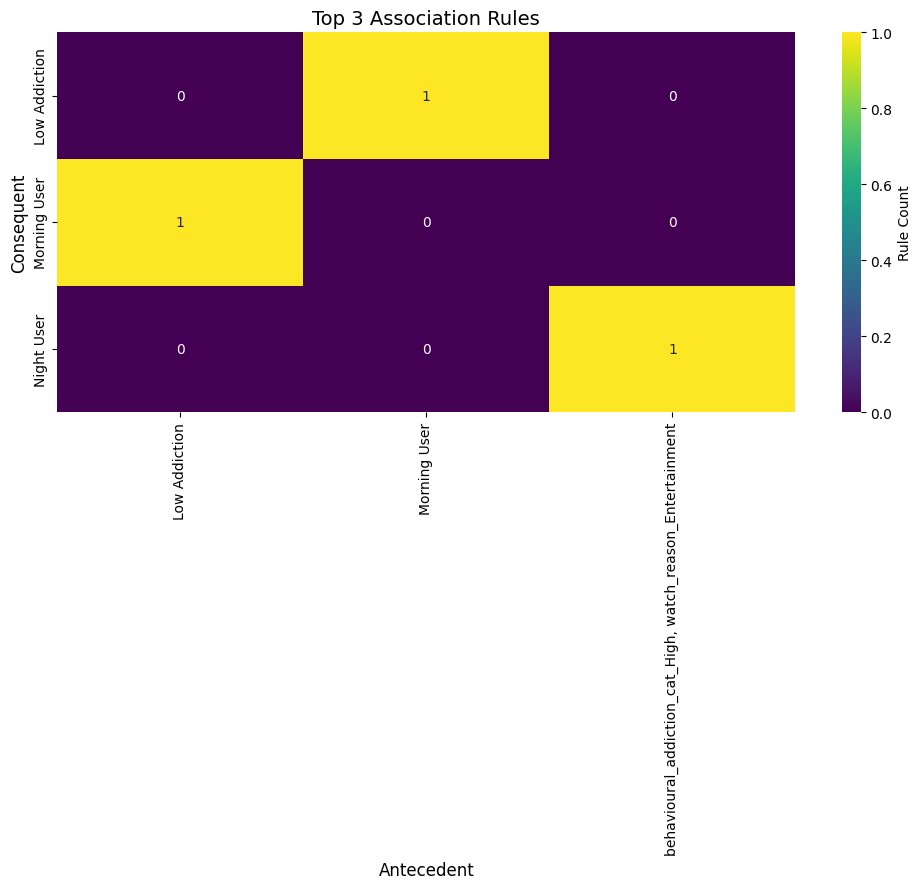

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to map encoded names labels
rename_map = {
    'frequency_Night': 'Night User',
    'frequency_Morning': 'Morning User',
    'behavioural_addiction_cat_High': 'High Addiction',
    'behavioural_addiction_cat_Low': 'Low Addiction',
    'watch_reason_Entertainment': 'Entertainment',
    'behavioural_addiction_cat_High': 'High Addiction',
}

# Apply renaming
top3_rules['Antecedent'] = top3_rules['Antecedent'].replace(rename_map)
top3_rules['Consequent'] = top3_rules['Consequent'].replace(rename_map)

# Creating frequency matrix
df_2dhist = pd.crosstab(top3_rules['Consequent'], top3_rules['Antecedent'])

# Plot heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(df_2dhist, annot=True, cmap='viridis', fmt='g',
            cbar_kws={'label': 'Rule Count'})
plt.title("Top 3 Association Rules", fontsize=14)
plt.xlabel("Antecedent", fontsize=12)
plt.ylabel("Consequent", fontsize=12)
plt.tight_layout()
plt.show()


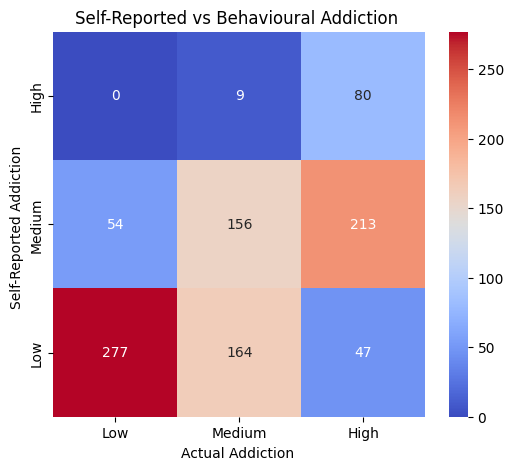

In [50]:
# Define custom orders
row = ["High", "Medium", "Low"]
col = ["Low", "Medium", "High"]
comparison = pd.crosstab(df['addiction_cat'], df['behavioural_addiction_cat'])

# rows and columns
comparison = comparison.reindex(index=row, columns=col, fill_value=0)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(comparison, annot=True, cmap="coolwarm", fmt='d')
plt.title("Self-Reported vs Behavioural Addiction ")
plt.ylabel("Self-Reported Addiction ")
plt.xlabel("Actual Addiction ")
plt.show()


SOME NON ML INSIGHTS

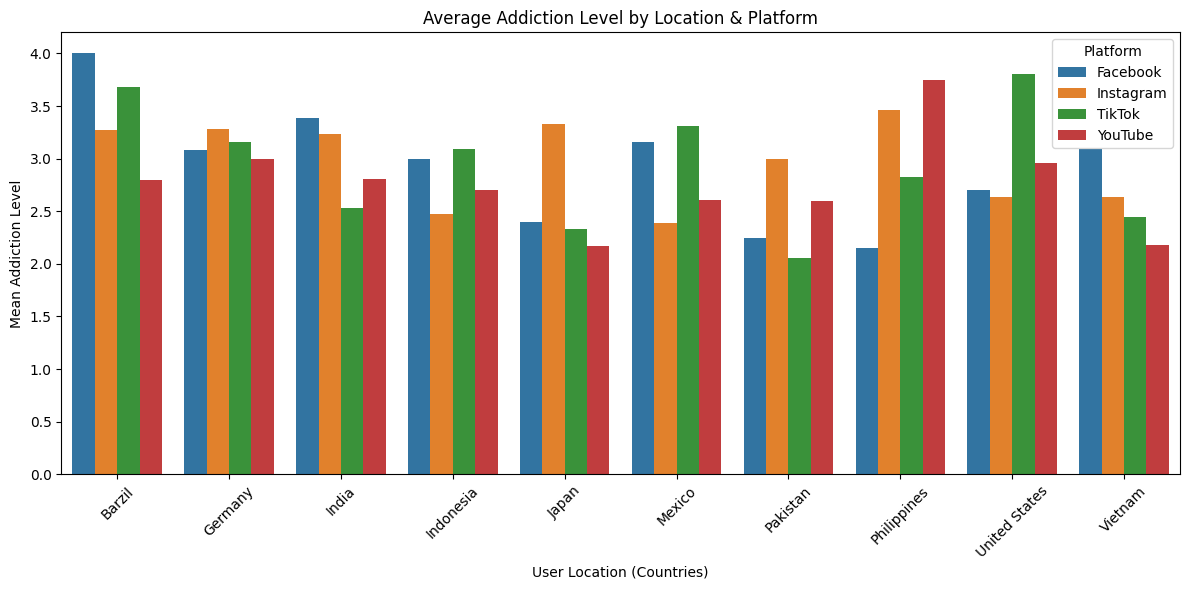

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Location and Platform
grouped = df.groupby(['location', 'platform'])['addiction_level'].mean().reset_index()

# Visualising
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='location', y='addiction_level', hue='platform')
plt.title("Average Addiction Level by Location & Platform")
plt.ylabel("Mean Addiction Level")
plt.xlabel("User Location (Countries)")
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

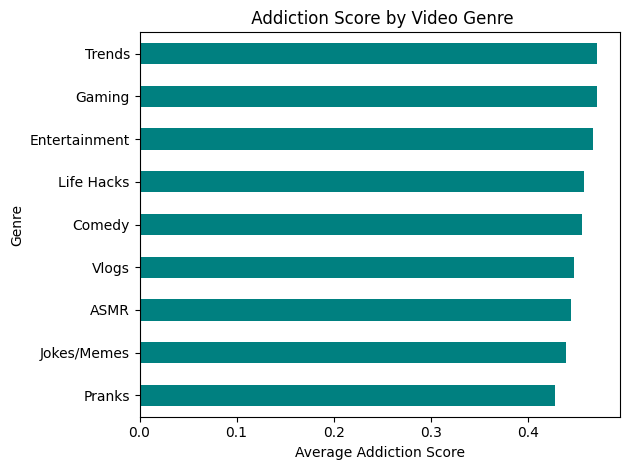

In [52]:
import matplotlib.pyplot as plt

df.groupby('video_category')['behaviour_addiction_score'].mean().sort_values().plot(kind='barh', color='teal')
plt.xlabel('Average Addiction Score')
plt.ylabel('Genre')
plt.title(' Addiction Score by Video Genre')
plt.tight_layout()
plt.show()
